## Assignment 1
Gitartha Bharadwaj

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
#ml4s.set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Problem 1
Define all the functions needed for part 1 in the following cell.

In [56]:
#==========================================================#
def print_rectangle(x):
    L = int(np.sqrt(len(x)))
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x)])]))

#==========================================================#
def generate_rectangles(L):
    N = 2**(L*L)
    result = []
    for i in range(N):
        array = []
        for j in range(L*L):
            bit = (i >> j) & 1
            array.append(bit)
        result.append(array)
    return result

#==========================================================#
def feed_forward(a0,w,b):
    ''' Compute the output of a deep neural network given the input (a0)
        and the weights (w) and biaes (b).
    '''
    a = a0
    num_layers = len(b)
    for ℓ in range(num_layers):
        wℓ = np.array(w[ℓ])
        z = np.dot(a,wℓ.T) + b[ℓ]
        a = 1.0/(1.0 + np.exp(-z))
    return a

### 1(a)
Peinted all 512 rectangles using the commented block of code and manually identifies a couple of rectangles. Those are printed in the cell below.

In [57]:
arr = generate_rectangles(3)

# for i in range(len(arr)):
#     print(i)
#     print_rectangle(arr[i])

print_rectangle(arr[27])
print_rectangle(arr[54])
print_rectangle(arr[56])
print_rectangle(arr[63])
print_rectangle(arr[511])

 ▉  ▉  ░ 
 ▉  ▉  ░ 
 ░  ░  ░ 

 ░  ▉  ▉ 
 ░  ▉  ▉ 
 ░  ░  ░ 

 ░  ░  ░ 
 ▉  ▉  ▉ 
 ░  ░  ░ 

 ▉  ▉  ▉ 
 ▉  ▉  ▉ 
 ░  ░  ░ 

 ▉  ▉  ▉ 
 ▉  ▉  ▉ 
 ▉  ▉  ▉ 



### 1(b)
Setting up the DNN and initializing the random weights and biases

In [58]:
N = [9,2,1]
w,b = [],[]

# append to the weights and biases list.  Make sure you get the dimensions correct!
for ℓ in range(1,len(N)):
    w.append(np.random.uniform(low=-10.0, high=10.0, size=[N[ℓ], N[ℓ-1]]))
    b.append(np.random.uniform(low=-1.0, high=1.0, size=N[ℓ]))

### 1(c)


In [59]:
x = np.array(generate_rectangles(3))
a_final = feed_forward(x, w, b)
a_final.shape

(512, 1)

### 1(d)
This distribution changes when we generate the random weights again.

Text(0, 0.5, 'Activation')

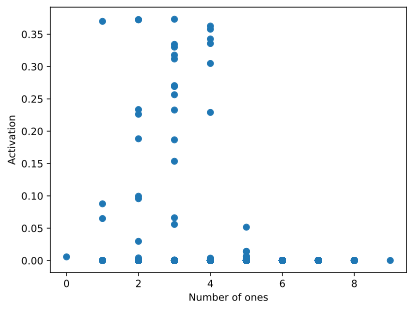

In [60]:
num_ones=np.sum(x,axis=1)
plt.scatter(num_ones, a_final)
plt.xlabel("Number of ones")
plt.ylabel("Activation")

## Problem 2
### 2(a) 
Define the Neural network. Then experimenting with the 2 weights and biases till we get a result close to the expected.
Best Neural network is printed below -

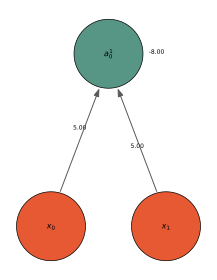

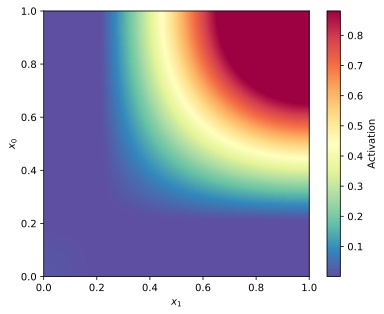

In [75]:
N = [2,1]
x = np.array([[0,0], [0,1], [1,0], [1,1]])
w,b = [[5.0, 5.0]],[[-8.0]]
a_final = feed_forward(x, w, b)

#=========================================
"Print the Neural Network"
ml4s.draw_network(N, weights=w, biases=b)
#=========================================
" Print the Solution "
a_final = a_final.reshape(2,2) # reshape for plotting

plt.imshow(a_final, extent=[0,1,0,1], cmap='Spectral_r', rasterized=True, interpolation='lanczos', origin='lower')
plt.colorbar(label='Activation')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

### 2(b)
Same process for an XOR

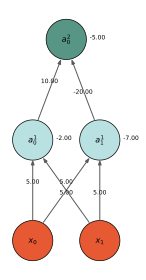

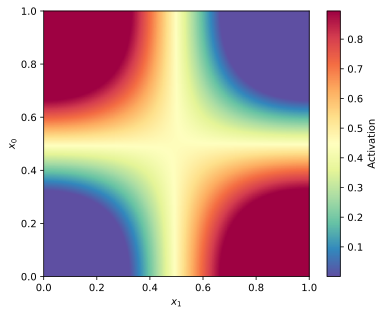

In [80]:
N = [2,2,1]
x = np.array([[0,0], [0,1], [1,0], [1,1]])
w,b = [[[5.0, 5.0], [5.0, 5.0]], [[10.0, -20.0]]],[[-2.0, -7.0], [-5.0]]
a_final = feed_forward(x, w, b)

#=========================================
ml4s.draw_network(N, weights=w, biases=b)
       
#=========================================
a_final = a_final.reshape(2,2) # reshape for plotting
plt.imshow(a_final, extent=[0,1,0,1], cmap='Spectral_r', rasterized=True, interpolation='lanczos', origin='lower')
plt.colorbar(label='Activation')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');